## 4.2.1 k-Means Implementation using Python
To practically apply to the k-Means Clustering concept, we use a commonly used Iris dataset (iris.csv) to demonstrate the implementation.  The Iris dataset has four attributes representing the length and width of three species' sepals and petals: Setosa, Virginica, and Versicolor. 

Use the following Python codes to access the Iris dataset and transform the categorical Species attribute to numerical data type.

In [3]:
import pandas as pd 
df = pd.read_csv('data/Iris.csv')

#transform categorical 'Species' data type to numeric
df.loc[df['Species'] == 'Iris-setosa', 'Species'] = 1 
df.loc[df['Species'] == 'Iris-versicolor', 'Species'] = 2 
df.loc[df['Species'] == 'Iris-virginica', 'Species'] = 3

using the `KMeans()` function, we first use the Elbow Curve method to identify the optimal k (number of clusters) for the Iris dataset. The following example codes produce an Elbow Curve plot. We use a user-defined variable named `wcss[]` to contain the WCSS (Within-Cluster Sum of Square, the Sum of squared distance between each point and the centroid in a cluster) generated at each k via the `inertia_` object. 

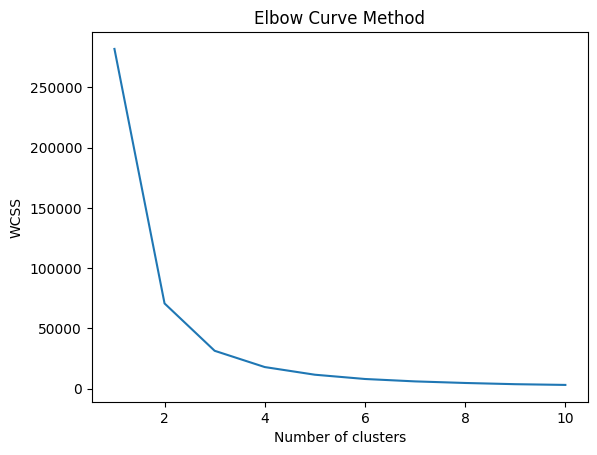

In [8]:

import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# identify optimal k using the Elbow Curve method
wcss = []
for i in range(1, 11):   # specified a range for the Elbow Curve x-axis
    model_elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    model_elbow.fit(df) 
    wcss.append(model_elbow.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

strFile = "plot_elbow.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig("img/"+strFile)
plt.clf()

After running the above codes, we can observe from the Elbow Curve plot (plot_elbow.png) that the elbow is at `k=3`, which means the Sum of Squared distances drops more suddenly compared to other points, suggesting the optimal k for this dataset is 3.

Now we can further confirm if k=3 is also the optimal number of clusters using the Silhouette method using the `silhouette_score()` function after forming several k clusters for comparison. The Elbow Curve method indicates that k=3 is the optimal number. Therefore, we initiate the range of k to validate to include k=3, for example, in the range of [2, 3, 4].  

The following Python codes calculate the Silhouette score using the `silhouette_score()` function for each k, then generate a Silhouette plot based on the score of each k in the range. 

For n_clusters = 2 The average silhouette_score is : 0.6204
For n_clusters = 3 The average silhouette_score is : 0.5824
For n_clusters = 4 The average silhouette_score is : 0.5563


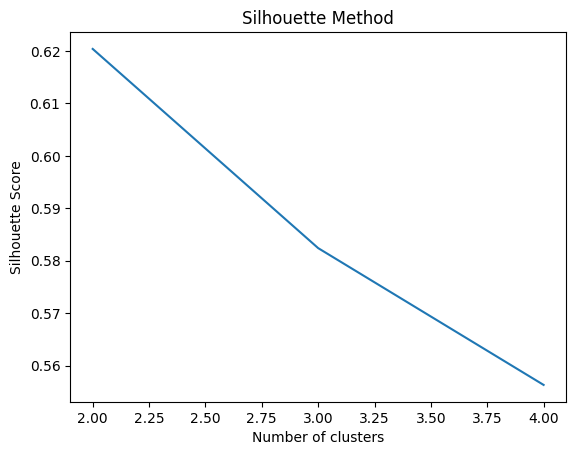

In [10]:
#identify the Silhouette scores according a range to include Elbow Curve finding

from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4] 
# take a range to include ELbow Curve finding 

silhouette_avg_n_clusters = [] 
for n_clusters in range_n_clusters: 
    # Initialize the clusterer with n_clusters value and a random generator seed 10 for reproducibility. 
    model_silhouette = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=10) 
    model_silhouette = model_silhouette.fit_predict(df)

    # The silhouette_score gives the average value for all the samples,ie. density and separation of the formed clusters 
    silhouette_avg = silhouette_score(df, model_silhouette) 
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg.round(4)) 
    silhouette_avg_n_clusters.append(silhouette_avg.round(4))

# alternately we can plot the k and respecitve silhouette score
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

strFile = "plot_silhouette.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig('img/'+strFile) 
plt.clf()  

After running the codes above, we can observe from the Silhouette plot generated (plot_silhouette.png) that the Silhouette score is maximized at `k = 2` (having the highest Silhouette score), suggesting 2 clusters is the optimum number to take.

To decide if `k=2` or `k-3` is a better choice, we can use scatter plots to compare how the data points are distributed across different k numbers, taking the k=3 suggested by the Elbow Curve method, and `k=2` indicated by the Silhouette method.

The following Python codes show examples of how we can produce the scatter plots for comparison. 

In [17]:
# to plot/compre clusters of different k generated by Elbow curve and Silhouette

fig = plt.figure(figsize=(50, 35))

# Plot Elbow Curve k clusters
k = 3 # k=3 suggested by the Elbow Curve
model_k = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0) #random_state=42) 
df_kmeans = model_k.fit_predict(df)   

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df.loc[df_kmeans == 0]['SepalLengthCm'], df.loc[df_kmeans == 0]['PetalLengthCm'], df.loc[df_kmeans == 0]['PetalWidthCm'],
            s=600, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
ax1.scatter(df.loc[df_kmeans == 1]['SepalLengthCm'], df.loc[df_kmeans == 1]['PetalLengthCm'], df.loc[df_kmeans == 1]['PetalWidthCm'],
            s=600, c='yellow', marker='o', edgecolor='black', label='Cluster 2')
ax1.scatter(df.loc[df_kmeans == 2]['SepalLengthCm'], df.loc[df_kmeans == 2]['PetalLengthCm'], df.loc[df_kmeans == 2]['PetalWidthCm'],
            s=600, c='red', marker='*', edgecolor='black', label='Cluster 3')
#ax1.view_init(30, -70)
ax1.set_xlabel("SepalLengthCm", fontsize=50)
ax1.set_ylabel("PetalLengthCm", fontsize=50)
ax1.set_zlabel("PetalWidthCm", fontsize=50)
ax1.set_title("Elbow Curve Clusters", fontsize=70)
ax1.legend(loc='upper center', prop={'size':45}, bbox_to_anchor=(0.5, -0.08), ncol=3)

# Plot Silhouette k clusters
k = 2 # k=2 suggested by Silhouette
model_k = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0) #random_state=42) 
df_kmeans = model_k.fit_predict(df)   

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df.loc[df_kmeans == 0]['SepalLengthCm'], df.loc[df_kmeans== 0]['PetalLengthCm'], df.loc[df_kmeans == 0]['PetalWidthCm'],
            s=600, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
ax2.scatter(df.loc[df_kmeans == 1]['SepalLengthCm'], df.loc[df_kmeans== 1]['PetalLengthCm'], df.loc[df_kmeans == 1]['PetalWidthCm'],
            s=600, c='yellow', marker='o', edgecolor='black', label='Cluster 2')
#ax1.view_init(30, -70)
ax2.set_xlabel("SepalLengthCm", fontsize=50)
ax2.set_ylabel("PetalLengthCm", fontsize=50)
ax2.set_zlabel("PetalWidthCm", fontsize=50)
ax2.set_title("Silhouette Clusters", fontsize=70)
ax2.legend(loc='upper center', prop={'size':45}, bbox_to_anchor=(0.5, -0.08), ncol=3)
fig.show()

strFile = "plot_compare_clusters.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig("img/"+strFile)
plt.clf()

C:\Users\Winnie Ng\AppData\Local\Temp\ipykernel_22260\3794401293.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 5000x3500 with 0 Axes>

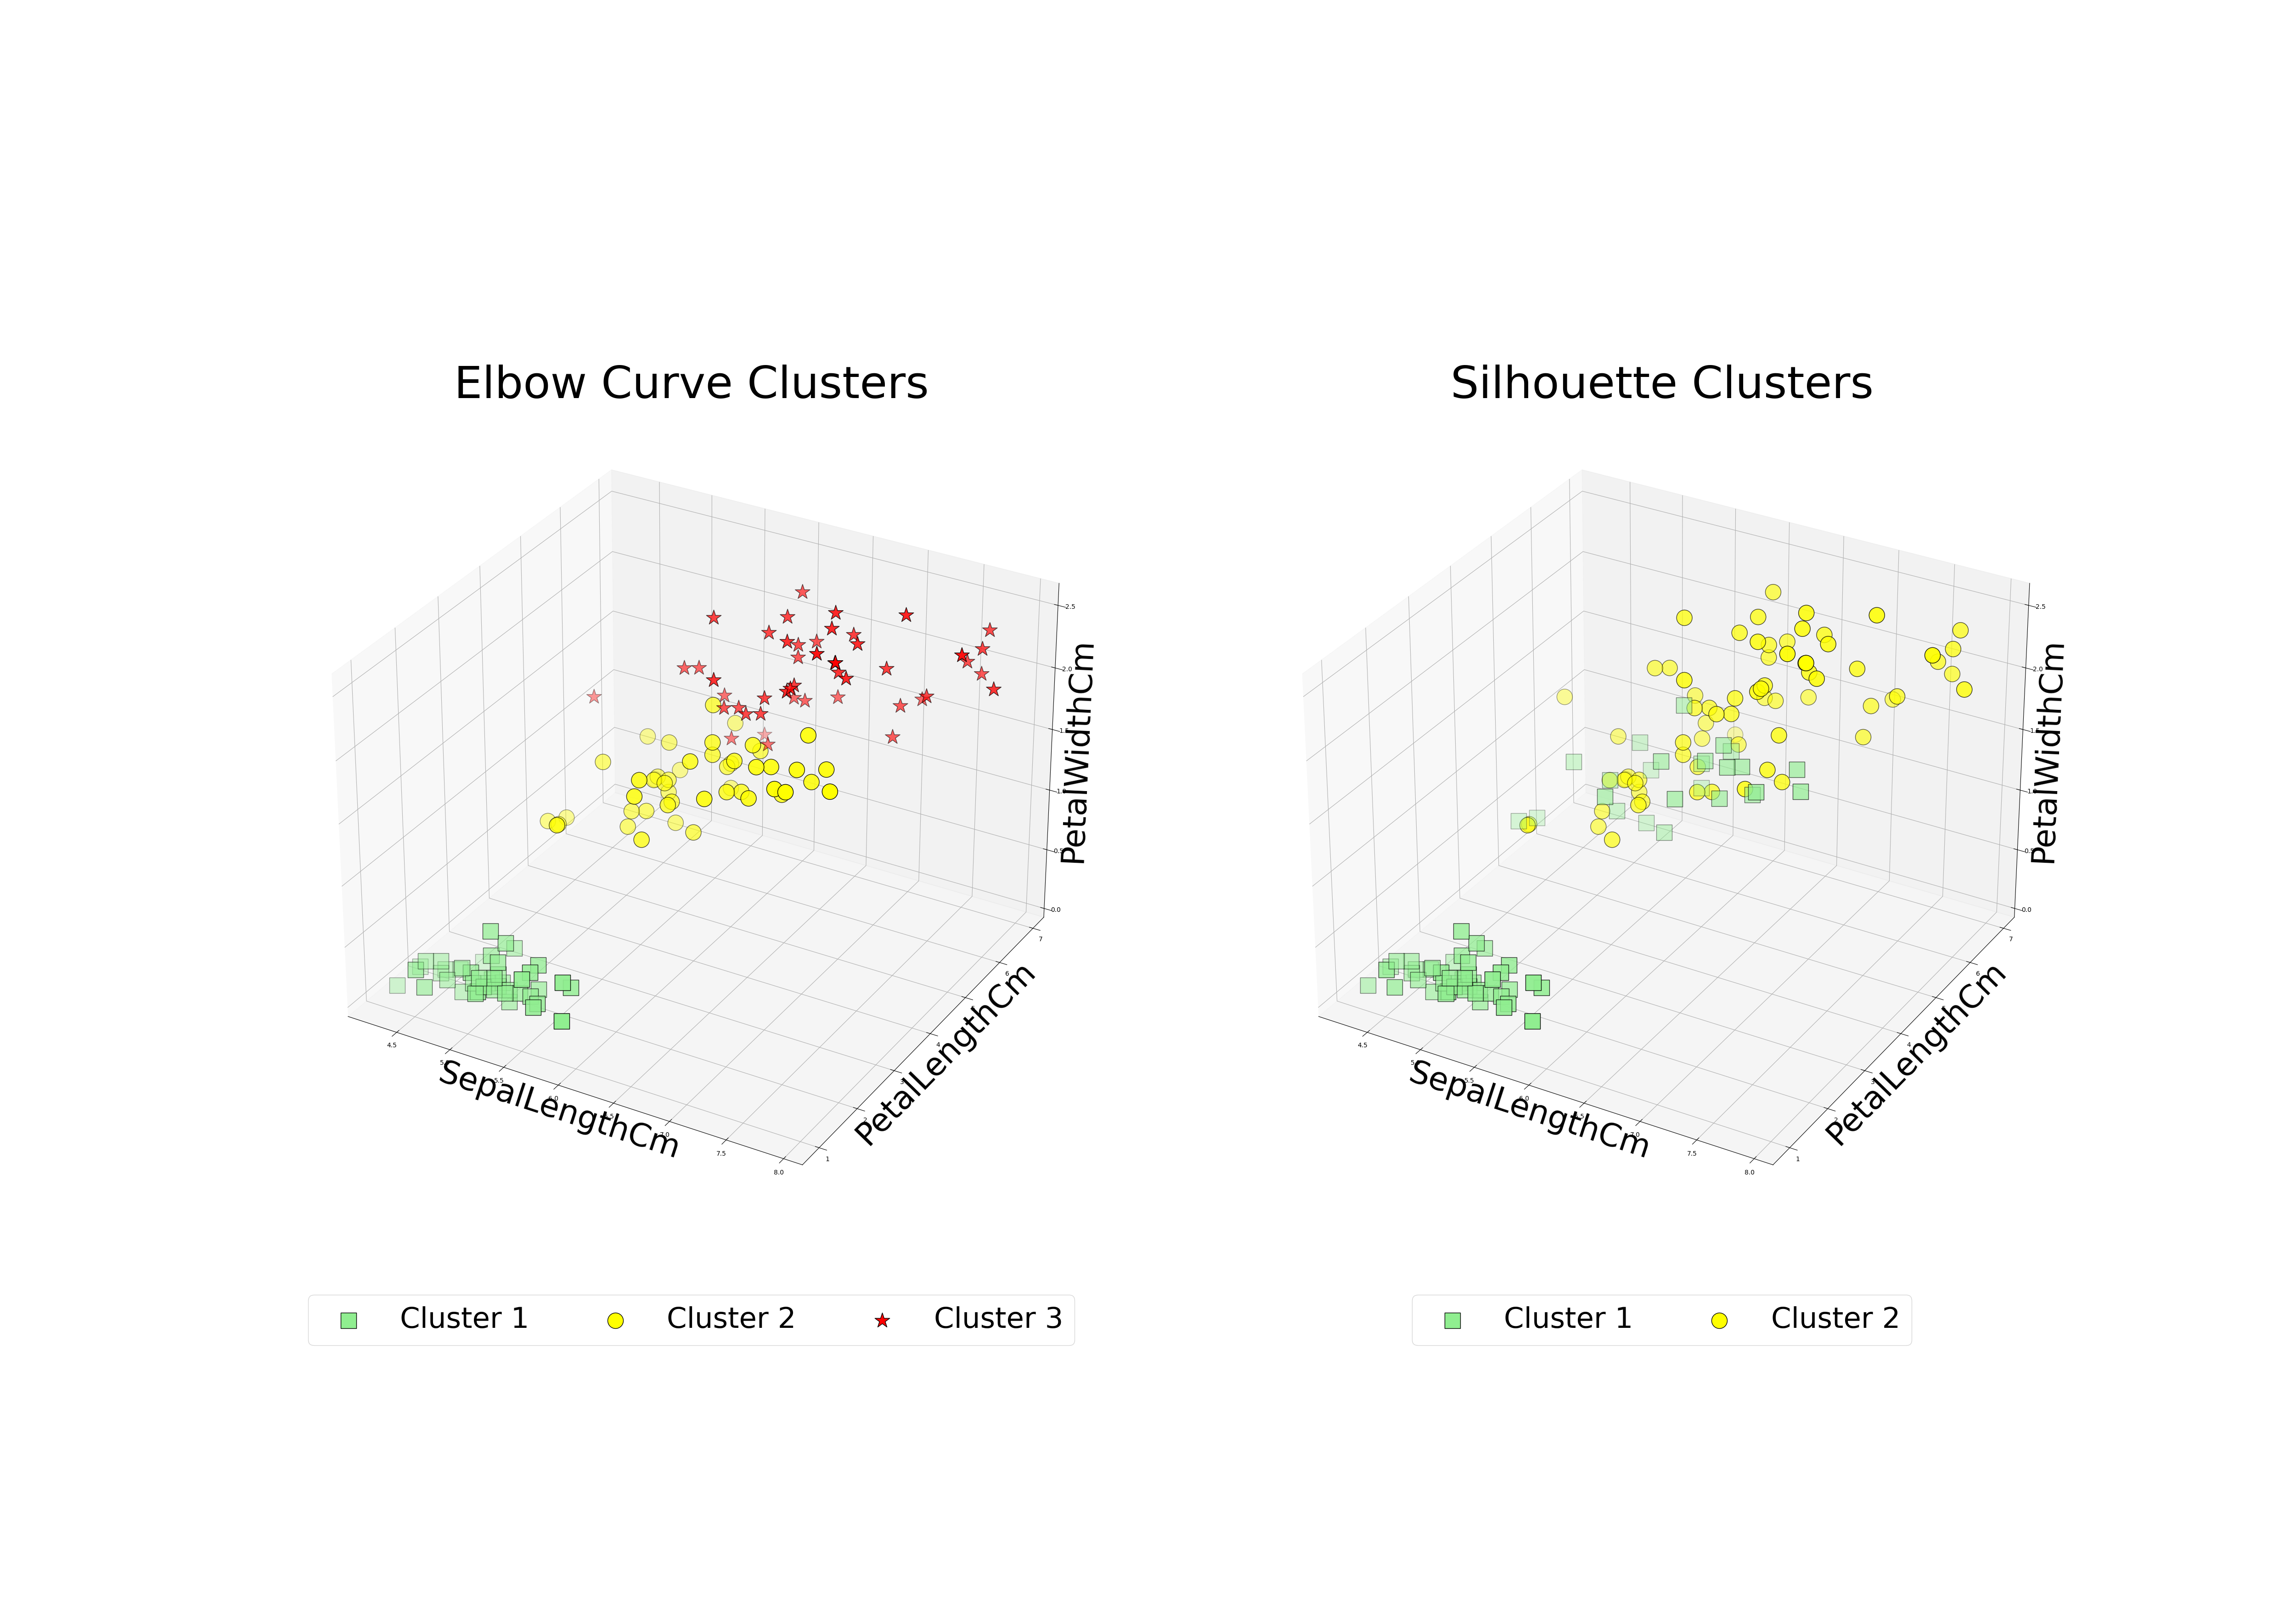

In [16]:
from IPython import display
display.Image("img/plot_compare_clusters.png")

Figure 8. Data Points Distributions in Different k Clusters based on Elbow Curve and Silhouette Methods 

Run the above codes and observe the scatter plots generated and saved in the "plot_compare_clusters.png" file. The following Figure 8 shows the results of the scatter plots.

We can see that k=3 (suggested by the Elbow Curve method) can separate different clusters farther than k=2 (suggested by the Silhouette method). Thus, for this Iris example, k=3 is a better choice as the optimal number of clusters. 

To interpret the three clusters (k=3) in Figure 8, we observe that Cluster 1 contains the data points that have a shorter size in Petal length and width compared to the other two clusters, and its Sepal length is concentrated in a shorter length. Whereas Cluster 3 poses data points having larger Petal length and width than the other clusters, with various Sepal lengths. Cluster 2 demonstrates a group of data points with a larger Petal length than Cluster 1 but a smaller Petal width than Cluster 3. 

### References:

The following links from the official website of sci-kit learn that I find helpful for implementing a clustering approach using Python codes. 

- To understand all the possible parameters of k-Means and their descriptions: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
- Example of k-Means clustering: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html?highlight=cluster
- For additional reference of different clustering algorithms (optional): https://scikit-learn.org/stable/modules/clustering.html?highlight=cluster